In [1]:
import sklearn.datasets as ds
#import scikits.audiolab 
import os
from utilities import *
import GetTranscription
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\backend\utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(


In [8]:
from m_dictionary import *
print(get_phonemes_for_word(query_string='prayers'))
print(MatchPhonesToText(query_string='kˈʌp')[0]['_source']['word'])

['ˈpɹeɪɝz/, /ˈpɹɛɹz']
cup


In [22]:
sr=22000
hop_length= int(sr/200)
frame_length = int(hop_length*2)

In [5]:
#load list of files
faia =fcs.get_audio_files(lvpath)
print("files count: ", len(faia))

files count:  2703


In [41]:
#Load single File from dataset
clip= librosa.load(faia[2300], sr= sr)[0]
print(clip.shape)
clip_trans = GetTranscription.get_file_transcript(faia[2300])
print(clip_trans)
ipd.Audio(clip ,rate=sr)

(299880,)
THE SHADOW OF HIS EVIL GIFT CLUNG TO HIM YET LIKE THE SMELL OF A DEADLY DRUG IN AN OLD VIAL OF POISON EMPTIED NOW USELESS READY TO BE THROWN AWAY UPON THE RUBBISH HEAP OF THINGS THAT HAD SERVED THEIR TIME


"THAT'S FUNNY REMARKED BETSY THOUGHTFULLY"

In [38]:
y, sr = librosa.load(faia[2500])
y_trim = librosa.effects.remix(y, intervals=librosa.effects.split(y))
mfcc = librosa.feature.mfcc(y=y_trim, sr=sr)

In [18]:
ipd.Audio(y_trim ,rate=sr)
y_trim.shape

(110361,)

In [14]:
librosa.feature.mfcc(clip).shape

(20, 152)

In [ ]:
splittingTest

In [ ]:
#create expectation model
EM = GaussianMixture(n_components=2, random_state=0,n_init=2)
for x in faia[1:10]:
    clip,sr= librosa.load(x)
    a = librosa.amplitude_to_db(clip)
    f= librosa.frequency_weighting(clip)
    s = np.c_[a,f]
    mfcc = librosa.feature.mfcc(clip)
    #features =librosa.feature.mfcc(clip,n_mfcc=2)
    #mfccswapped = np.swapaxes(features,0,1)
    EM.fit(mfcc)
    

In [21]:
stft = librosa.stft(clip)

In [269]:
clip.shape

(106171,)

In [42]:
mfcc = librosa.feature.mfcc(clip)
audio= librosa.feature.inverse.mfcc_to_audio(mfcc)
audio.shape
#ipd.Audio(audio)

(299520,)

In [275]:
mfccswapped = np.swapaxes(mfcc,0,1)

In [276]:
mfccswapped[1]

array([-557.92786   ,   30.79919   ,   26.363699  ,   20.274414  ,
         14.044828  ,    9.070487  ,    6.2172637 ,    5.6060085 ,
          6.6548433 ,    8.347401  ,    9.617987  ,    9.712074  ,
          8.400061  ,    5.9855156 ,    3.1278436 ,    0.5643088 ,
         -1.156625  ,   -1.8354816 ,   -1.6311877 ,   -0.93769145],
      dtype=float32)

In [ ]:
a = librosa.amplitude_to_db(clip)
f= librosa.frequency_weighting(clip)
s = np.c_[a,f,np.arange(0,len(clip))/sr]

In [ ]:
np.newaxis(a)

In [ ]:
plt.plot(test1)
plt.show()

In [ ]:
test1

In [ ]:
librosa.amplitude_to_db(clip)

In [ ]:
from joblib import dump, load

In [ ]:
dump(EM, 'silenceVoiceClusterEM.joblib') 

In [ ]:
clip,sr= librosa.load(faia[1500])
features =librosa.feature.mfcc(clip,n_mfcc=2)
mfccswapped = np.swapaxes(features,0,1)

x = EM.predict(mfccswapped)

In [ ]:
mfccswapped = np.swapaxes(features,0,1)
mfccswapped

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(features, x_axis="time", sr=sr)
plt.colorbar(format ="%+2f")
plt.show()

In [ ]:
time = np.arange(0,len(clip))/sr

In [ ]:
fig, ax = plt.subplots()
ax.plot(time,clip)
#ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')

In [ ]:
pitches, magnitudes = librosa.piptrack(y=clip, sr=sr)
print(pitches)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

In [202]:
a_file= open("test.txt","w")
np.savetxt(a_file, p )
a_file.close()

In [ ]:
clip_trans

In [ ]:
TextToPhonemeCharacters.get_phonemes_for_sentence(clip_trans)

In [32]:
#Extract MFCC features from audio file
mfcc = librosa.feature.mfcc(clip, sr= sr)
mfcc.shape


(20, 255)

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


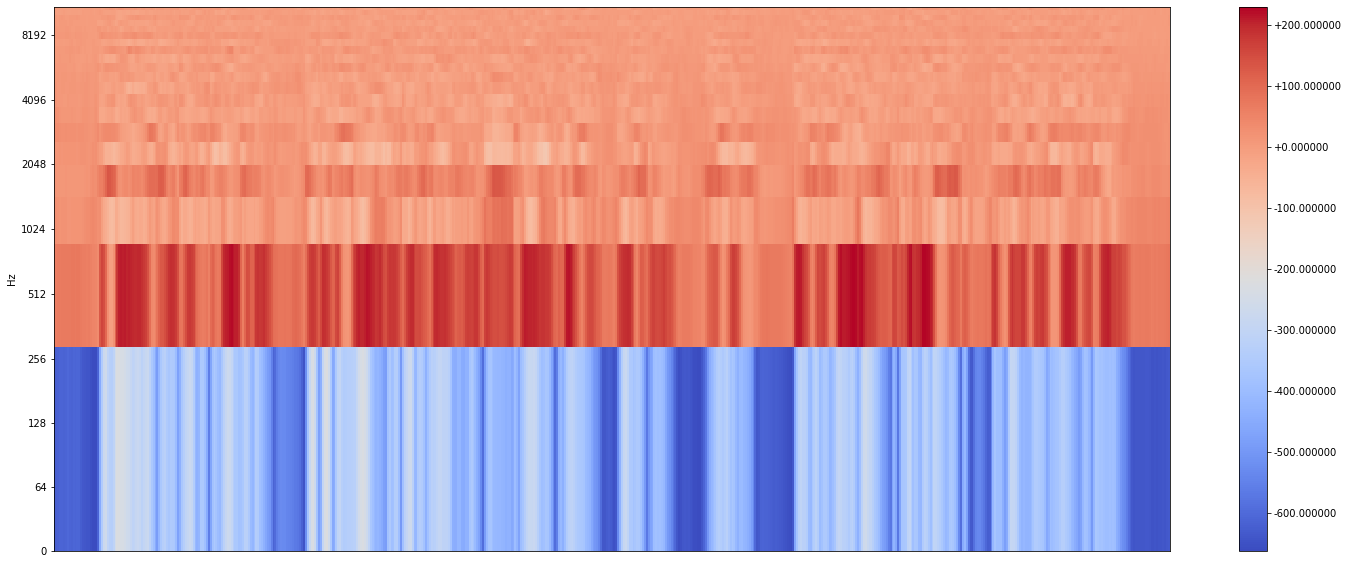

In [43]:
#plot heatmap of features
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc, y_axis="log", sr=sr)
plt.colorbar(format ="%+2f")
plt.show()

In [13]:
delta_mfcc = librosa.feature.delta(mfcc)
delta_mfcc2 = librosa.feature.delta(delta_mfcc)

In [33]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfcc, x_axis="time", sr=sr)
plt.colorbar(format ="%+2f")
plt.show()

NameError: name 'delta_mfcc' is not defined

<Figure size 1800x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfcc2, x_axis="time", sr=sr)
plt.colorbar(format ="%+2f")
plt.show()

In [23]:
stft = librosa.stft(clip, hop_length=512, n_fft= 2048)


In [24]:
spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)
spectogram


array([[1.53195709e-01, 1.20414989e-02, 3.66462879e-02, ...,
        2.21865565e-01, 1.21075846e-01, 1.88447222e-01],
       [2.04792917e-01, 1.61979094e-01, 1.78008348e-01, ...,
        1.24271616e-01, 7.93283209e-02, 1.19201139e-01],
       [2.24674582e-01, 1.18105881e-01, 6.01543821e-02, ...,
        3.01264197e-01, 2.30507448e-01, 1.82614967e-01],
       ...,
       [7.51427840e-04, 3.75709613e-04, 1.21856267e-08, ...,
        3.18735371e-09, 1.73009612e-05, 4.99857881e-04],
       [7.51425046e-04, 3.75707052e-04, 1.25757031e-08, ...,
        9.77110926e-09, 1.72993005e-05, 4.99851769e-04],
       [7.51421554e-04, 3.75718810e-04, 8.96971108e-10, ...,
        1.55704551e-08, 1.72968048e-05, 4.99843329e-04]], dtype=float32)

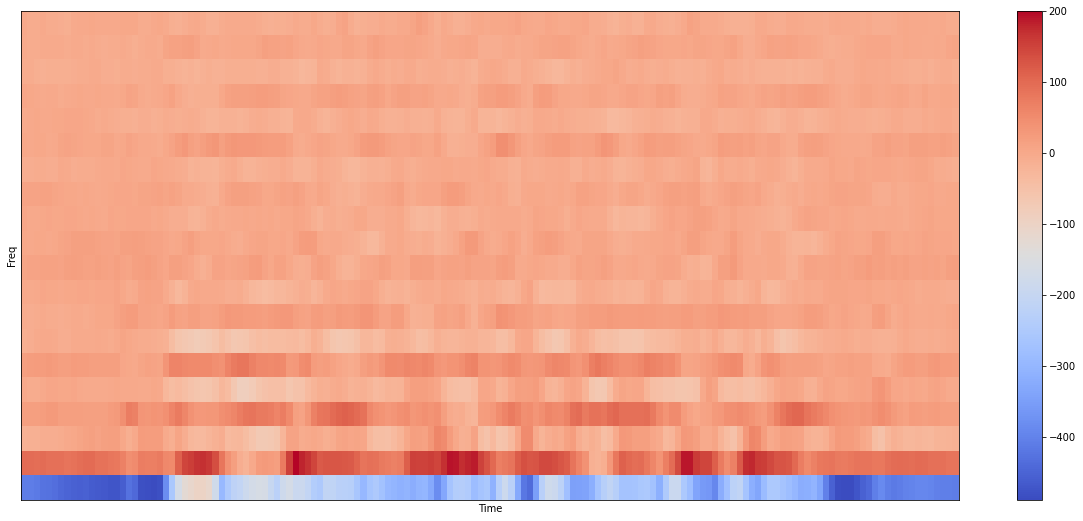

In [27]:
plt.figure(figsize=(21,9))
librosa.display.specshow(mfcc)
plt.xlabel("Time")
plt.ylabel("Freq")
plt.colorbar()
plt.show()